# ECE 5470 Lab 6 Report: 3D Image Processing


### by Cynthia Li


In [280]:
import numpy as np
from v4 import vx
from v4 import vd

from itkwidgets import view
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Section 3. Three-dimensional filtering

To start with the lab, we are encouraged to explore scripting, 3D object and shape generation, and visualizations. The intro notebook was provided as an example to walk through the process. 

#### Intro Notebook Understanding

Text(0.5, 1.0, 't1makepy scripting content')

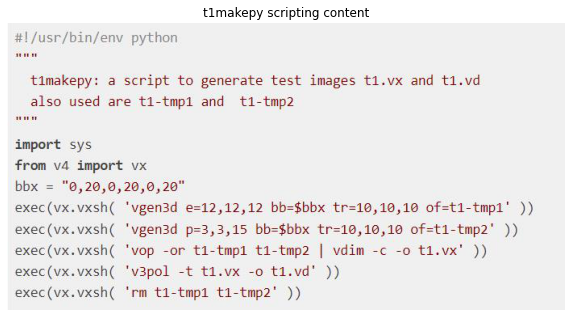

In [250]:
t1makepy_content = mpimg.imread('t1makepy.jpg')
plt.figure(figsize = (10, 7)) 
imgplot = plt.imshow(t1makepy_content)
plt.axis('off') 
plt.title("t1makepy scripting content")

##### Scripting
The t1makepy file shows us how scripting in linux shell command language and python differs. Specifically, for python, we need to set the environment by stating "#!/usr/bin/env python", import packages such as vx and sys, and execute commands by using "exec(vx.vxsh(COMMAND_GOES_HERE))".

##### 3D object Generation
From the script t1makepy, we can see that we can use the vgen3d method to generate 3D objects. 

The first vgen3d command generates an arbitrary ellipsoid (by specifying all three dimensions in e= parameter) in dimension 20x20x20 (by specifying bb=) with 10 pixel translation with respect to each cartesian axes(by specifying tr=). The second vgen3d command generates an elliptic cylinder with radius of 3 and height of 15(by specifying p= parameter) in dimension 20x20x20 with 10 pixel translation with respect to each cartesian axes as well. The translation is required for both command to place the generated object in the center of the dimension. 

After the two shape is generated, we used vop method to integrate two shapes. vop essentially perform logical or operations on both shapes: this is like overlapping two 20x20x20 space and focus on the spaces occupied by at least one of the ellipsoid or the elliptic cylinder. Then the new shape is pipelined to vdim to create frame markers and generate the vx file. 

Finally the v3pol method will convert the vx image to a polygon representation, modifying a standard table of triangular polygons to prevent holes in the new surfaces generated. 

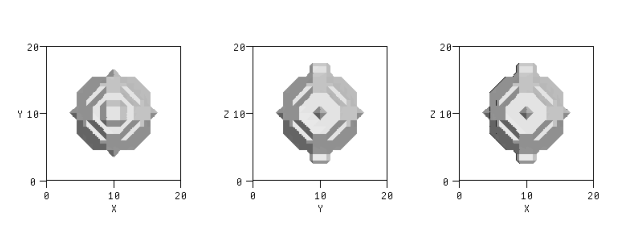

Demonstration of cardinal views
<scaled size: (258 x 772) >


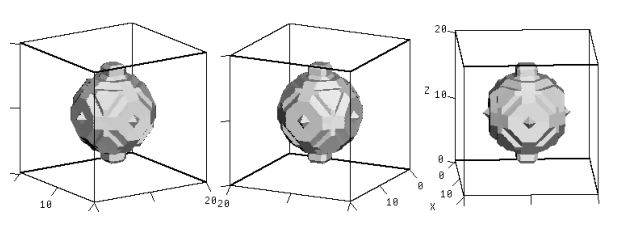

Demonstraion of selected views
<scaled size: (256 x 768) >


In [251]:
## demonstraion of visualization tools
exec(vx.vxsh('t1makepy'))
exec(vx.vxsh('v3view if=t1.vd of=t1vis.vx'))
exec(vx.vxsh('v3view -yo if=t1.vd ang=120 | vtile n=3,1 of=t1vis.vs '))
exec(vx.vxsh('v3view -yo -gif if=t1.vd of=t1vis.gif'))
vd.dispmvx('t1vis.vx', capt='Demonstration of cardinal views')
vd.dispmvx('t1vis.vs', capt='Demonstraion of selected views')

##### Visualization
With the t1makepy script executed, the above code then uses v3view to show the 3d visualization of the object generated. The first v3view command defaultly generates the cardinal view of the object (orthogonal views); the second v3view command enabled the -yo option to display the 3d y-axis oblique view of the object with 120 degree rotation each time; the last v3view command generate a gif image of of the 3d y-axis oblique view.

#### Smoothing On Polygon

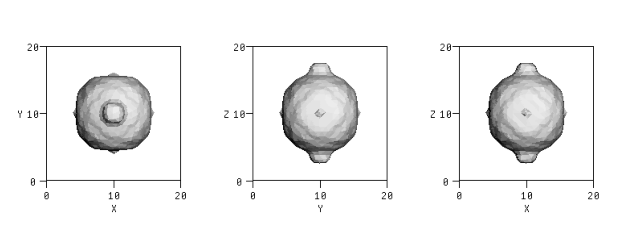

Filtered polygon with cardinal views


<scaled size: (258 x 772) >


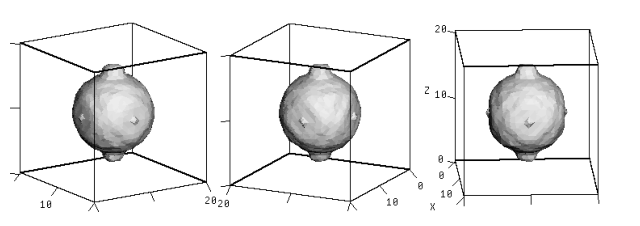

Filtered polygon with selected views


<scaled size: (256 x 768) >


In [252]:
exec(vx.vxsh('v3pfilt -a t1.vd -o t1f.vd'))
exec(vx.vxsh('v3view  t1f.vd of=t1f.vx'))

exec(vx.vxsh('v3view if=t1f.vd of=t1fvis.vx'))
exec(vx.vxsh('v3view -yo if=t1f.vd ang=120 | vtile n=3,1 of=t1fvis.vs '))
exec(vx.vxsh('v3view -yo -gif if=t1f.vd of=t1fvis.gif'))
vd.dispmvx('t1fvis.vx', capt='Filtered polygon with cardinal views\n\n')
vd.dispmvx('t1fvis.vs', capt='Filtered polygon with selected views\n\n')

From the above result of the filtered polygon, we can easily see that the polygon has been smoothed. The original polygon has sharp edges and pointy corners while the filtered results has curvatures that smoothed the edges (so the center part becomes roughly more like a sphere) and made the protrusion at the top and the bottom rounder as well. 

While the smoothed results may seem appealing to human perception, smoothing process itself indicates information loss, and therefore, is not always desired. It is really what we want to achieve defines how much information loss we can accept or to what the degree of smoothing we want. And if we need to be one hundred percent precise with the polygons, then we don't even need filtering.

#### Morphological Filtering on Polygon

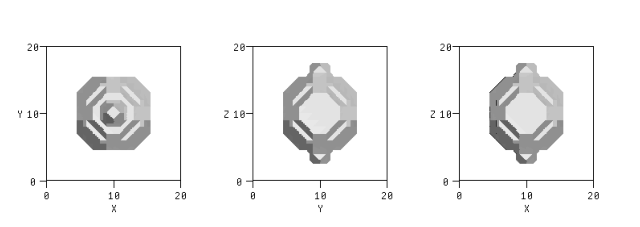

Morphological filtering on polygon with cardinal views: s= 3, 3, 3 


<scaled size: (258 x 772) >


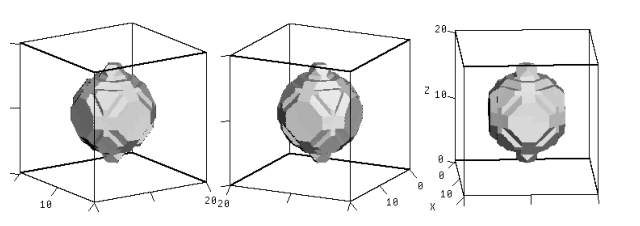

Morphological filtering on polygon with selected views: s= 3, 3, 3


<scaled size: (256 x 768) >


In [253]:
exec(vx.vxsh('vmorph t1.vx -ed t=s s=3,3,3 | vdim -c  of=n3.vx'))
exec(vx.vxsh('v3pol -t if=n3.vx of=n3.vd'))
# visualize  the result
exec(vx.vxsh('v3view n3.vd of=n3vis.vx'))
exec(vx.vxsh('v3view -yo if=n3.vd ang=120 | vtile n=3,1 of=n3vis.vs '))

vd.dispmvx('n3vis.vx', capt='Morphological filtering on polygon with cardinal views: s= 3, 3, 3 \n\n')
vd.dispmvx('n3vis.vs', capt='Morphological filtering on polygon with selected views: s= 3, 3, 3\n\n')

We performed morphological opening (-ed option) on the polygon, which used a spherical/ellipsoidal kernel (t=s option) of 3x3x3 dimension (s= parameter) to first removes pixels on the boundary (erosion) and then add pixels back to the boundary (dilation). From the above result, we can see that morph does have some effect on removing the protrusion, but the current parameter of s = 3, 3, 3 is not optimal to achieve this purpose.

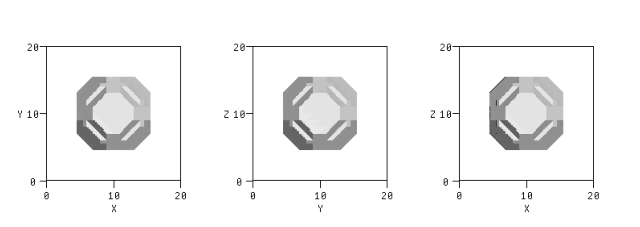

Optimal Morphological filtering on polygon to remove protrusion with cardinal views: s= 8, 8, 8 


<scaled size: (258 x 772) >


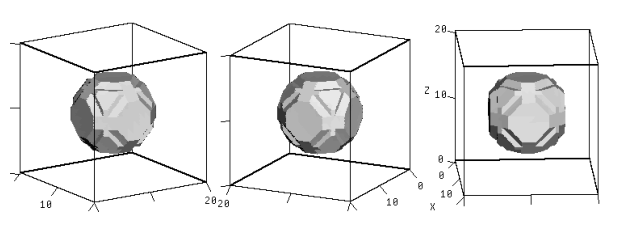

Optimal Morphological filtering on polygon to remove protrusion with selected views: s= 8, 8, 8 


<scaled size: (256 x 768) >


In [254]:
exec(vx.vxsh('vmorph t1.vx -ed t=s s=8,8,8 | vdim -c  of=n8.vx'))
exec(vx.vxsh('v3pol -t if=n8.vx of=n8.vd'))
# visualize  the result
exec(vx.vxsh('v3view n8.vd of=n8vis.vx'))
exec(vx.vxsh('v3view -yo if=n8.vd ang=120 | vtile n=3,1 of=n8vis.vs '))

vd.dispmvx('n8vis.vx', capt='Optimal Morphological filtering on polygon to remove protrusion with cardinal views: s= 8, 8, 8 \n\n')
vd.dispmvx('n8vis.vs', capt='Optimal Morphological filtering on polygon to remove protrusion with selected views: s= 8, 8, 8 \n\n')

After trying different sets of parameters, we can see from the above result that the protrusion removal works the best with the parameter set s = 8, 8, 8. The top and the bottom protrusion and the pointy things on the sides are totally removed, no new protrusions are generated, and the rest of the original shape is kept as intact as possible.

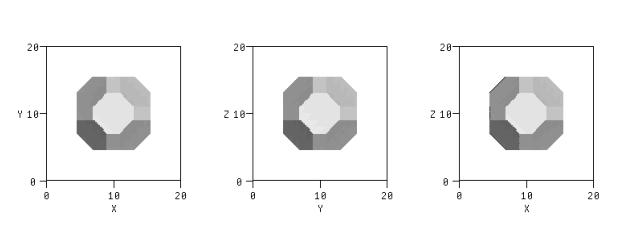

Morphological filtering on polygon with cardinal views: s= 6, 6, 6 


<scaled size: (258 x 772) >


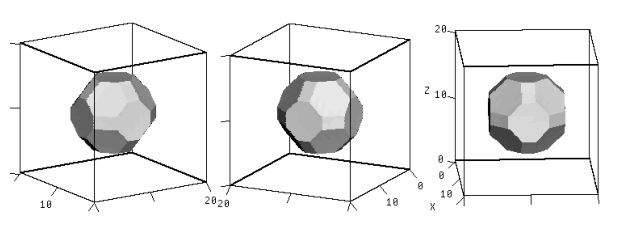

Morphological filtering on polygon with selected views: s= 6, 6, 6 


<scaled size: (256 x 768) >


In [255]:
exec(vx.vxsh('vmorph t1.vx -ed t=s s=6,6,6 | vdim -c  of=n6.vx'))
exec(vx.vxsh('v3pol -t if=n6.vx of=n6.vd'))
# visualize  the result
exec(vx.vxsh('v3view n6.vd of=n6vis.vx'))
exec(vx.vxsh('v3view -yo if=n6.vd ang=120 | vtile n=3,1 of=n6vis.vs '))

vd.dispmvx('n6vis.vx', capt='Morphological filtering on polygon with cardinal views: s= 6, 6, 6 \n\n')
vd.dispmvx('n6vis.vs', capt='Morphological filtering on polygon with selected views: s= 6, 6, 6 \n\n')

The above result of morph filter on the polygon with s = 6, 6, 6 shows one problem with morph filter: when the kerner size is selected too small, it might be able to remove the protrusions, but the rest of the shape would be smoothed as well, resulting in significant information loss on the rest of the shape.

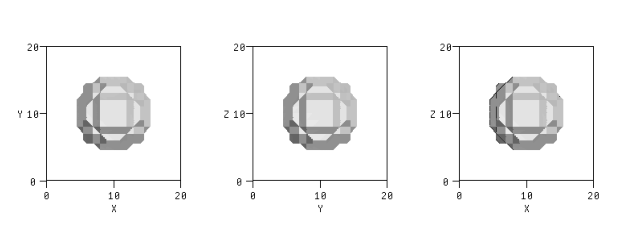

Morphological filtering on polygon with cardinal views: s= 10, 10, 10 


<scaled size: (258 x 772) >


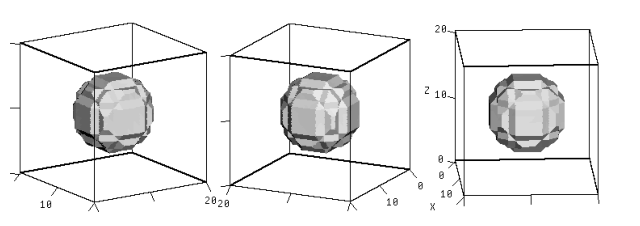

Morphological filtering on polygon with selected views: s= 10, 10, 10 


<scaled size: (256 x 768) >


In [256]:
exec(vx.vxsh('vmorph t1.vx -ed t=s s=10,10,10 | vdim -c  of=n10.vx'))
exec(vx.vxsh('v3pol -t if=n10.vx of=n10.vd'))
# visualize  the result
exec(vx.vxsh('v3view n10.vd of=n10vis.vx'))
exec(vx.vxsh('v3view -yo if=n10.vd ang=120 | vtile n=3,1 of=n10vis.vs '))

vd.dispmvx('n10vis.vx', capt='Morphological filtering on polygon with cardinal views: s= 10, 10, 10 \n\n')
vd.dispmvx('n10vis.vs', capt='Morphological filtering on polygon with selected views: s= 10, 10, 10 \n\n')

The above result of morph filter on the polygon with s = 10, 10, 10 shows another problem with morph filter: when the kernel size is selected too large, the algorithm may remove the protrusion but start to create new edges/faces on the polygon, and creating new information of the object is typically not desired.

Last but not the least, even when the parameter is carefully chosen after many attempts on different parameter combinations (in this case, s = 8, 8, 8), we cannot select a local area where we want to apply the morph filter to remove the regional protrusion. Instead, we are forced to apply the filter to the entire image which may result in smoothing other protrusions that are wanted (here, such as the protruding points on the side of the polygon).

## Section 3 Three-dimensional Edge Detector
### 3.1 3D edge detection algorithm

In [ ]:
#!/usr/bin/env python
""" v3dedge: 2x2x2  canny edge detection for 3D images

"""
from v4 import vx
import sys
import numpy as np
import math
    
def v3dedge ( img ) :

    im = img.i
    tmimage = vx.Vx( img ) 
    tmimage.embedim((1,1,1,1,1,1))
    tm = tmimage.i

    for z in range(im.shape[0]):
        for y in range(im.shape[1]):
            for x in range(im.shape[2]):
                # computing the gradient between odd pixel neighbors in each direction
                grdX = round(float(tm[z+1][y+1][x+2]) - float(tm[z+1][y+1][x]))
                grdY = round(float(tm[z+1][y+2][x+1]) - float(tm[z+1][y][x+1]))
                grdZ = round(float(tm[z+2][y+1][x+1]) - float(tm[z][y+1][x+1]))
                # compute the magnitude of the gradient
                im[z, y, x] = round(math.sqrt(grdX**2 + grdY**2 + grdZ**2))  
    
    # find the maximum gradient
    grd_max = np.max(im)
    print(grd_max)
    
    # rescale the gradient to 0-255 scale
    for z in range(im.shape[0]):
        for y in range(im.shape[1]):
            for x in range(im.shape[2]):
                im[z, y, x] = round(im[z, y, x] / grd_max * 255)
                

vargs = vx.vaparse( "if= of= -v  - ")
if '-' in vargs:
    print ("v3dmenapy 3D mean python example program")
    print ("if= input file")
    print ("of= output file")
    print ("[-v] verbose mode")
    sys.exit(0)

for arg in ['if', 'of']:
    if arg not in vargs:
        print ('v3dmenapy error: required parameter %s is missing' % arg)
        sys.exit(1)
optv = '-v' in vargs

ximage = vx.Vx( vargs['if'] );  # read image

v3dedge(ximage);  # pass the image to perform edge detection and thresholding

if optv:
    print (ximage.i);  # for very small images
ximage.write(vargs['of']);  # Write the result file

##### Program Description:

The program reads in an image and calls a sub function v3dedge to process the image. Specifically, v3dedge will zero-pad one line to each edge of the image, then loop through every non-padded pixel in the embedded image to compute its gradient in each direction and then use the gradient in each direction to compute the magnitude of the gradient of the pixel. It will put the magnitude of the gradient to a new image and then loop through the pixel again to scale the gradient image to 0-255 scale and write it to the specified output image.

Some consideration and using the algorithm in real setting:
1. For noise reduction: we will need to use a low pass filter first before applying the gradient estimation
2. Gradient estimation: the gradient can be approximated based on [x] and [x+1], [x] and [x-1], or [x-1] and [x+1]. Here, we decided to use [x-1] and [x+1] because the other two would somewhat shift the gradient and because this takes both neighbors into consideration and gives a averaged gradient based on the information of both.
3. Scaling to 255 scale: How I did it here is to find the maximum element in the gradient image, scaling it as 255, using the proportionality to scale every gradient pixel correspondingly so that the new resulted gradient image would have scale from 0 to 255. This can also be done by simply using 'vpix -scale' command and option as well. 
4. Thresholding: In gradient estimation, we believe that the edge of the foreground would have large different from inside of the object and the background (large gradient in other words) and therefore, a large gradient value indicating that this pixel is an edge. Since the output image has every pixel value as the gradient, we want to select a threshold value carefully to filter out the pixels that are not an edge and set the edge pixels to 255. These might requires us to look at the statistics/histograms/content of the image and try many times to decide the optimal threshold.
5. Dealing with unsigned byte image: 1. when calculating the gradient in each direction, the minus operation means that negative number may appear, which the unsigned byte type does not support, in this case, I casted it to float type. Here, since values do not involve in decimal points and is not put in the image, it shouldn't make any difference than casting to integer type. 2. After calculating the magnitude (gradient magnitude is equal to the square root of sum of the square of gradient in each direction), Math.sqrt returns a float type, therefore, for the result to fit into unsigned byte image without overflow, we want to cast it to integer, so I used python built-in round function.

### 3.2 Experiments And Results

#### Small Image Test

Here with the program built, I'll first test its program's performance on small 3d image below.

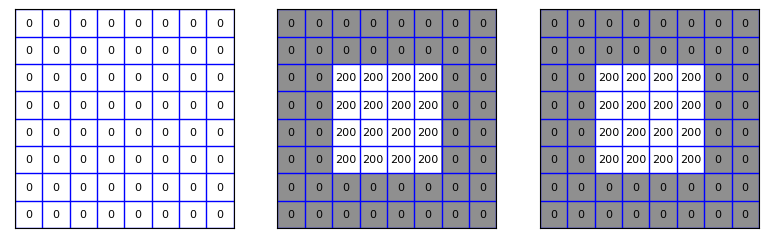

<scaled size: (8 x 8) (8 x 8) (8 x 8) >


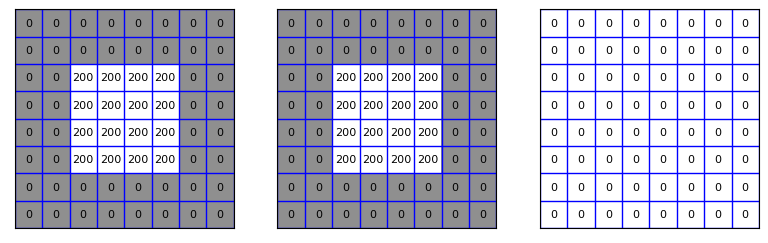

3D test image
<scaled size: (8 x 8) (8 x 8) (8 x 8) >


In [317]:
# generate a test image for v3dedge
! vgenim s=8 z=6 r=2,2,2 of=tst1 hi=200
# visualize the test image for J
tim = vx.Vx('tst1')
vd.dispsvx(tim.i[0], tim.i[1], tim.i[2])
vd.dispsvx(tim.i[3], tim.i[4], tim.i[5], capt='3D test image')

Using the vgenim method, we set up a 8x8x6 space, placed a 4x4x4 cube in the center and connected to full-size top and the bottom in each direction, size 8x8 in this case (filled by default setting of -r), filling the cube, top and the bottom with value 200. The vd.dispsvx method then shows the 3d object's cross section at different z values (0-5). 

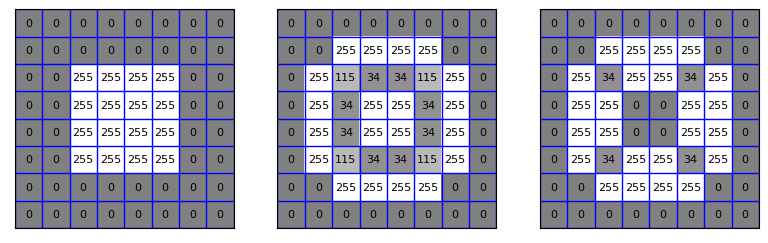

<scaled size: (8 x 8) (8 x 8) (8 x 8) >


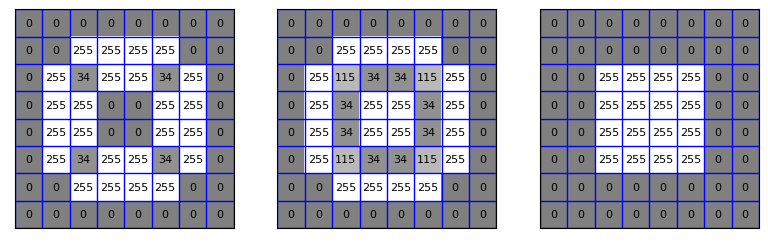

3D test image after edge detection
<scaled size: (8 x 8) (8 x 8) (8 x 8) >


In [316]:
exec(vx.vxsh('python3 v3dedge tst1 of=tst1e'))
tim2 = vx.Vx('tst1e')
vd.dispsvx(tim2.i[0], tim2.i[1], tim2.i[2])
vd.dispsvx(tim2.i[3], tim2.i[4], tim2.i[5], capt='3D test image after edge detection')

The above sequence of image shows the results of test1 image after edge detection performed by v3dedge. From the result we can see that the edges are all identified and different edge (corners, edges and faces) are identified to have different gradient.

#### Large Image Tests

In [129]:
exec(vx.vxsh('t2make'))

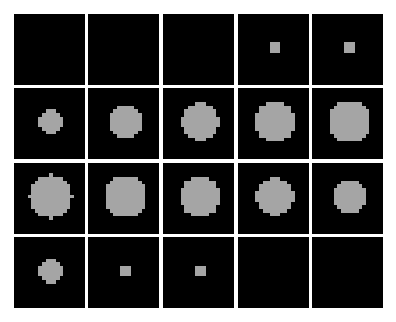

Original t1g.vx


<scaled size: (85 x 106) >


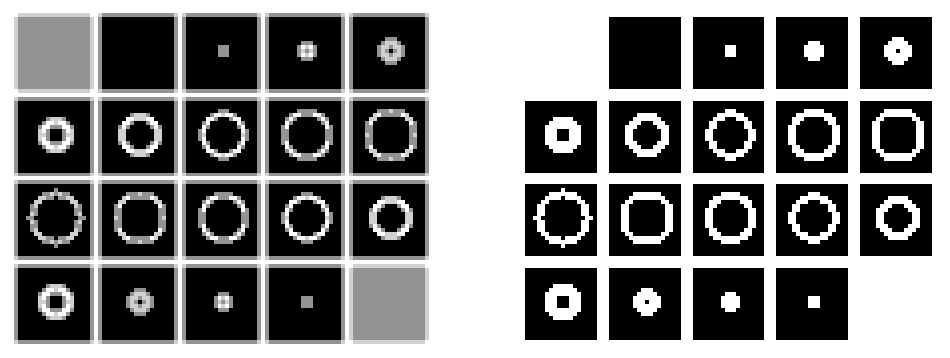

Edge detection on t1g.vx vs. thresholded edge detection result with th=140


<scaled size: (85 x 106) (85 x 106) >


In [274]:
# Generate original t1g.vx and add randomly generated noise to it
exec(vx.vxsh('vpix t1.vx lo=100 hi=200 th=1 of=t1g.vx'))
exec(vx.vxsh('vpix t1g.vx gn=25 of=t1n.vx'))

# Display the original t1g and t1n
for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1g.vx | vxfile of=dg' ))
exec(vx.vxsh( 'vtile dg n=5,4 -ib -xb of=dgt' ))
vd.dispmvx('dgt', capt="Original t1g.vx\n\n")

# edge detection 
exec(vx.vxsh('python3 v3dedge t1g.vx of=t1ge.vx'))
exec(vx.vxsh('vpix th=140 if=t1ge.vx of=t1gt.vx'))

for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1ge.vx | vxfile of=dge8' ))
exec(vx.vxsh( 'vtile dge8 n=5,4 -ib -xb of=dge8t' ))

for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1gt.vx | vxfile of=test33' ))
exec(vx.vxsh( 'vtile test33 n=5,4 -ib -xb of=test32t' ))
vd.dispmvx('dge8t', 'test33t', size = 1.5, capt="Edge detection on t1g.vx vs. thresholded edge detection result with th=140\n\n")

Then I tested the program on the large image t1g.vx genereated by vpix function given. From the above result of t1g.vx, we can see that using just the v3dedge function that we created can already give a nice output showing the boundary of the circles in the original image, though the circle seemed to become slightly larger. 

However, thresholding can provide a even better result. To determine a nice thresholding result, I've looked into the histogram of the edge detection result in simba view, which showed spikes at only 0, 147, 210, 255. From here we can see that 147, 210, 255 are all part of the boundary in t1ge.vx (the edge detected result), so I selected th=140 to smooth the circle, making it all 255. 

Both have smooth and fully connected results, which are ideal results, prooving that our algorithm works pretty well.

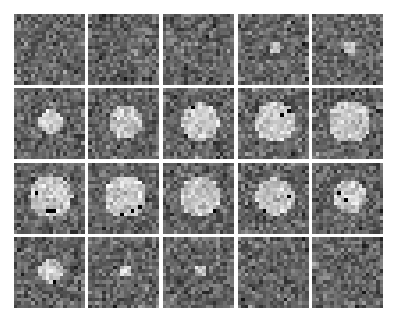

Noise Added t1n.vx


<scaled size: (85 x 106) >


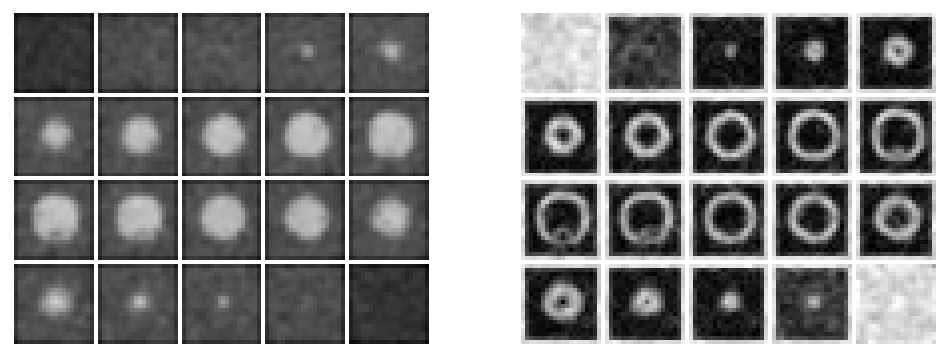

LPF Results on t1n.vx and Edge Detected Result after LPF


<scaled size: (85 x 106) (85 x 106) >


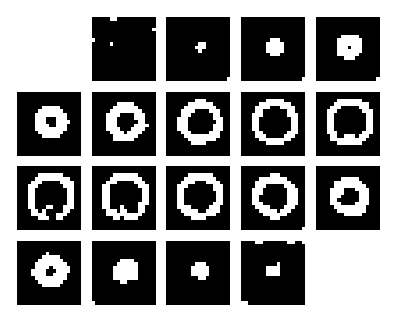

Optimal Thresholding result of edge detected t1e.vx with th = 100
<scaled size: (85 x 106) >


In [275]:
# Display the noise addedg t1n
for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1n.vx | vxfile of=dt1n' ))
exec(vx.vxsh( 'vtile dt1n n=5,4 -ib -xb of=dt1nt' ))
vd.dispmvx('dt1nt', capt="Noise Added t1n.vx\n\n")

# LPF for noise-added image
exec(vx.vxsh('vgfilt xs=0.8 ys=0.8 zs=0.8 t1n.vx of=t1f.vx'))
# edge detection on noise removed image
exec(vx.vxsh('python3 v3dedge t1f.vx of=t1e.vx'))
exec(vx.vxsh('vpix th=100 if=t1e.vx of=t1t.vx'))

for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1f.vx | vxfile of=df8' ))
exec(vx.vxsh( 'vtile df8 n=5,4 -ib -xb of=df8t' ))
for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1e.vx | vxfile of=de8' ))
exec(vx.vxsh( 'vtile de8 n=5,4 -ib -xb of=de8t' ))
vd.dispmvx('df8t', 'de8t', size = 1.5, capt="LPF Results on t1n.vx and Edge Detected Result after LPF\n\n")

for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1t.vx | vxfile of=test31' ))
exec(vx.vxsh( 'vtile test31 n=5,4 -ib -xb of=test31t' ))
vd.dispmvx('test31t', capt="Optimal Thresholding result of edge detected t1e.vx with th = 100")

Here we generated random noise with standard deviation of 25 and added to the t1g.vx image. The new noise disturbing image is shown above as t1n.vx. Since there is high-frequency noise, we want to use a low pass filter first to ensure a smooth result later on. I compared the effect of v3dmeanpy and vgfilt and selected vgfilt as it makes it smoother. I also tested different xs, ys, and zs values on vgfilt and decided to choose xs=0.8, ys=0.8, zs=0.8 as they provides enough smooth effect to erase the noisy points but wouldn't smooth the rest hardly, causing too much information lost. The results of filtered t1n.vx is shown above.

Then I applied the edge detection on the filtered image. From the result shown above, we can see that it is rather smooth except that in image 11 and 12, the bottom edge is still disturbed due to the noise. But overall, it produces a pretty nice outcome.

Last, I tried many times on thresholding to produce a good output of the edge. Here, simba viewer's histogram cannot help much as the noise is strong and there is not obvious local minimum to divide the boudary and the rest. After many attempts, I found that th=100 produces the optimal result as it does not keep many noisy points but identifies full boundary for most frames and even for image 11 and 12, the result seems OK.

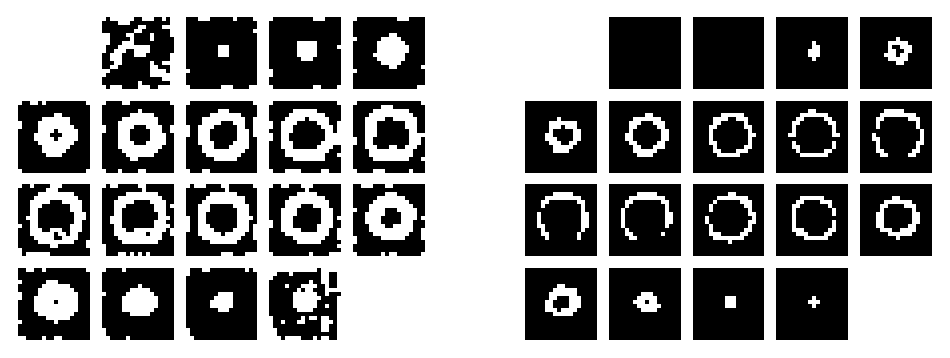

Edge Detected t1n.vx: th=70 vs th=150


<scaled size: (85 x 106) (85 x 106) >


In [244]:
exec(vx.vxsh('vpix th=70 if=t1e.vx of=t1t.vx'))
for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1t.vx | vxfile of=test32' ))
exec(vx.vxsh( 'vtile test32 n=5,4 -ib -xb of=test32t' ))

exec(vx.vxsh('vpix th=150 if=t1e.vx of=t1t.vx'))
for i in range (1,21):
    exec(vx.vxsh( 'vclip f=$i t1t.vx | vxfile of=test27' ))
exec(vx.vxsh( 'vtile test27 n=5,4 -ib -xb of=test27t' ))
vd.dispmvx('test32t', 'test27t', size = 1.5, capt="Edge Detected t1n.vx: th=70 vs th=150\n\n")

Here we compare the edge detection result with different thresholding than th=100 which we considered as optimal. We can see on the left that when the thresholding value is too small, many noise points are kept, the detected edge is even thicker and slightly distorted in shape. And from the right image we can see that when the th is selected too high, the edge is becomes thinner, which is ideal but it becomes disconnected at some parts against our expectation. 

### Discussion

Overall, this section allowed us to explore the 3d shape generation and operations and prompted us to look into the visionx documentations to better understant the code. It is also where we can integrate our previous knowledge on filtering, edge operating, visualization into one place. For further improvement, we can try to use non-max suppression to make the thresholded detected edge thinner, which would make the results more ideal.

### 4.Three-dimensional Segmetnation Evaluation



In [302]:
exec(vx.vxsh('analsegpy'))

As the comment in analsegpy suggests, the program will read in the mannually marked lung ct images and compare it to the "ground truth" segmentation file and visualize the compared result in images. It will also create binary boundary files and create 3d representation of the image with light shading. 

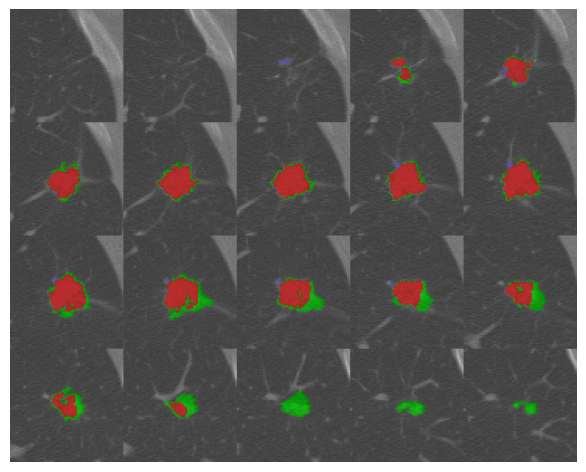

Visualized result of manually segmented CT image compared to the ground truth


<scaled size: (292 x 365) >


In [303]:
vd.dispmvx('dcompare.vx', size = 1.5, capt="Visualized result of manually segmented CT image compared to the ground truth\n\n")

From the result, we can see that the Ground truth provided is marked as red and the manual input by myself is marked as green. We can see that in most of the images, the green part overlapps with the red area, ther is no undercovered regions. However, there are many overcovered regions. This is most likely due to lack of knowledge and experience with CT images and node identification. For example, during the segmenation, the CT images has the node region in mixed by pixels in different levels of light grey, it is hard for us, who does not have any knowledge, to accurately decide to which degree it still belongs to the node and to which degree it might be just some other connected parts that we don't care about. Also, as shown in frame 63 to 65 (the last three images), we can see that to some degree, the expert would consider the shading unimportant anymore, however, as amateurs, we don't really know so we would likely to still mark it as crucial. Both can be improved by training and experiences, with more knowledge, we are likely to be able to tighten the boundary and provide a more accurate result. 

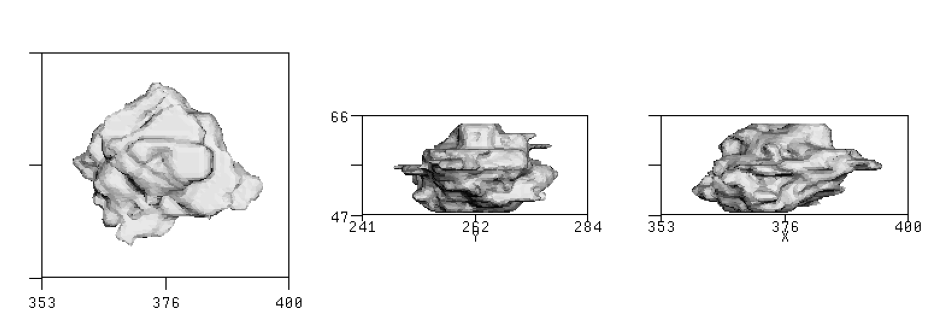

3D visualization Of The Node Marked By Manual Segmentation


<scaled size: (258 x 772) >


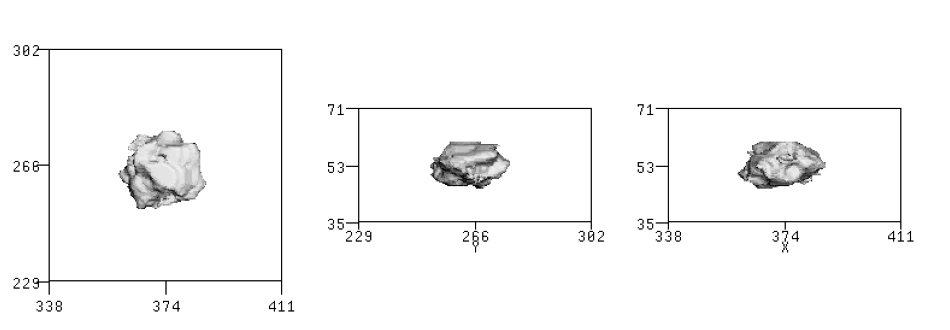

3D Visualization Of The Node Marked By Ground Truth


<scaled size: (258 x 772) >


In [313]:
vd.dispmvx('dmregion.vx', size = 1.5, capt="3D visualization Of The Node Marked By Manual Segmentation\n\n")
vd.dispmvx('dnodseg.vx', size = 1.5, capt="3D Visualization Of The Node Marked By Ground Truth\n\n")

From the 3D visualization of the node marked by myself and by the ground truth, we can clearly see that the overcovering that we mentioned earlier resulted in a bigger volume in my segmentation, though the shape is approximately consistent. However, we do see some weird protrusions sticking out of my 3D representation, which might be a result of markings of image 16, 17, 19, 20. To this step, we can see that my marking wasn't very successful as the identified volume is too big and included weird protrusions.

Text(0.5, 1.0, 'compare.txt Statistics')

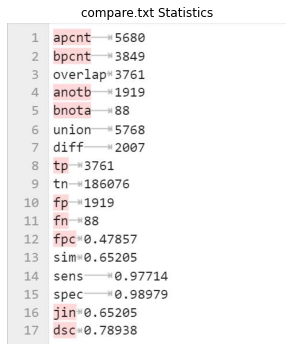

In [321]:
compare = mpimg.imread('compare.jpg')
plt.figure(figsize = (5, 10)) 
imgplot = plt.imshow(compare)
plt.axis('off') 
plt.title("compare.txt Statistics")

From the statistics shown in the compare.txt, we can see that fpc=0.47857, which is computed from (ground truth - (overcover + undercover)) / ground truth, in other words, pixels that are correctly identified. In this case, a less than 50% accuracy tells me that the marking is horribl, the overcovering is too much (more than 50%), and I should definitely have tightened the bound for a better performance. My Jaccard Index is 0.65205, and Dice Index is 0.78938, which seem more acceptable than the fpc. They show the accuracy in terms of correctly identified pixels / total area (the two has different way defining total area). These two, however, reduced the effect of undercovering and overcovering in the evaluation compared to fpc. Therefore, though the three statistics are all evaluating the accuracy, they have very different emphasis and result. It's the user's call which method is more important. 

But here for me, I think fpc cannot be ignored as it shows that the result is really bad. Also, the Jaccard Index and the Dice Index, though showing a much better result, are still not acceptable in my opinion, since this is a medical analysis and accuracy and precision really matters.
